In [1]:
import pandas as pd
import sklearn
import time
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("data/train.csv",index_col=0)
df_test = pd.read_csv("data/test.csv",index_col=0)
df_train.head()

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
id,,,,,,,,,,,,
0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0


In [3]:
df_test.head()

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul)
id,,,,,,,,,,,
0,2843.0,156.0,1358.52,730.78,637.85,127.06,94.82,1588.62,45,1,3256.0
1,437.0,137.0,509.43,268.05,243.07,390.86,98.24,1002.76,51,1,491.0
2,826.0,82.0,1232.22,493.42,744.08,516.28,320.15,2200.58,32,0,1381.0
3,861.0,50.0,1512.86,925.51,590.07,380.25,25.80,1929.10,50,0,1377.0
4,1160.0,157.0,890.42,403.91,489.53,266.92,87.63,1251.52,43,0,1844.0


In [4]:
# check empty entries
null_info = df_train.isnull().sum()
print(null_info)

MO HLADR+ MFI (cells/ul)    1
Neu CD64+MFI (cells/ul)     1
CD3+T (cells/ul)            0
CD8+T (cells/ul)            0
CD4+T (cells/ul)            0
NK (cells/ul)               0
CD19+ (cells/ul)            0
CD45+ (cells/ul)            0
Age                         0
Sex 0M1F                    0
Mono CD64+MFI (cells/ul)    1
label                       0
dtype: int64


In [5]:
# fill up empty entries with median
median1 = df_train["MO HLADR+ MFI (cells/ul)"].median()
median2 = df_train["Neu CD64+MFI (cells/ul)"].median()
median3 = df_train["Mono CD64+MFI (cells/ul)"].median()
df_train["MO HLADR+ MFI (cells/ul)"]= df_train["MO HLADR+ MFI (cells/ul)"].fillna(median1)
df_train["Neu CD64+MFI (cells/ul)"]= df_train["Neu CD64+MFI (cells/ul)"].fillna(median2)
df_train["Mono CD64+MFI (cells/ul)"]= df_train["Mono CD64+MFI (cells/ul)"].fillna(median3)

null_info = df_train.isnull().sum()
print(null_info)

MO HLADR+ MFI (cells/ul)    0
Neu CD64+MFI (cells/ul)     0
CD3+T (cells/ul)            0
CD8+T (cells/ul)            0
CD4+T (cells/ul)            0
NK (cells/ul)               0
CD19+ (cells/ul)            0
CD45+ (cells/ul)            0
Age                         0
Sex 0M1F                    0
Mono CD64+MFI (cells/ul)    0
label                       0
dtype: int64


In [6]:
x = df_train.drop(["label"], axis=1)
y = df_train["label"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=100)
x_test = df_test.copy()

In [7]:
#define Decision Tree Classifier with criterion of entropy and depth of 5
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)  
trainingTime = time.time() #training start time
clf.fit(x_train, y_train)
trainingTime = time.time() - trainingTime #calculate training time 
out = clf.predict(x_val) #result of prediction with tree
accuracy = metrics.accuracy_score(y_val, out) #accuracy score
precision = metrics.precision_score(y_val, out, average='weighted') #precision score
recall = metrics.recall_score(y_val, out, average='weighted') #recall score
f1 = metrics.f1_score(y_val, out, average='weighted') #f1 score
#output
print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('training time: ', trainingTime)

accuracy:  0.7777777777777778
precision:  0.7811965811965812
recall:  0.7777777777777778
f1:  0.7685185185185185
training time:  0.0035600662231445312


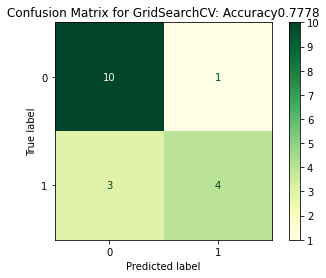

In [8]:
ConfusionMatrixDisplay.from_predictions(y_val.values, out, cmap='YlGn')
plt.title("""Confusion Matrix for GridSearchCV: Accuracy{:.4}""".format(accuracy))
plt.show()

In [9]:
id_list = x_test.index.tolist()
y_test_decisiontree = clf.predict(x_test).tolist()
df_sub_decisiontree = pd.DataFrame({"id":id_list, "label":y_test_decisiontree})
df_sub_decisiontree.to_csv("submission_decisiontree.csv",index=False)

In [10]:
#bulid KNN classifier
knn = KNeighborsClassifier(algorithm='ball_tree') 
trainingTime = time.time() #training start time
knn.fit(x_train, y_train)
trainingTime = time.time() - trainingTime #calculate training time
out = knn.predict(x_val) #result of prediction with KNN
accuracy = metrics.accuracy_score(y_val, out) #accuracy score
precision = metrics.precision_score(y_val, out, average='weighted') #precision score
recall = metrics.recall_score(y_val, out, average='weighted') #recall score
f1 = metrics.f1_score(y_val, out, average='weighted') #f1 score
#output
print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('training time: ', trainingTime)

accuracy:  0.8333333333333334
precision:  0.8333333333333335
recall:  0.8333333333333334
f1:  0.830546265328874
training time:  0.002446413040161133


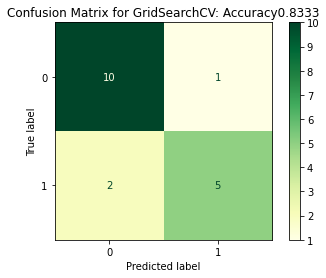

In [11]:
ConfusionMatrixDisplay.from_predictions(y_val.values, out, cmap='YlGn')
plt.title("""Confusion Matrix for GridSearchCV: Accuracy{:.4}""".format(accuracy))
plt.show()

In [12]:
y_test_knn = knn.predict(x_test).tolist()
df_sub_knn = pd.DataFrame({"id":id_list, "label":y_test_knn})
df_sub_knn.to_csv("submission_knn.csv",index=False)

In [13]:
#build random forest with 100 estimators
rfc = RandomForestClassifier(n_estimators = 100)
trainingTime = time.time() #training start time
rfc.fit(x_train, y_train)
trainingTime = time.time() - trainingTime #calculate training time
out = rfc.predict(x_val) #result of prediction with Random Forest
accuracy = metrics.accuracy_score(y_val, out) #accuracy score
precision = metrics.precision_score(y_val, out, average='weighted') #precision score
recall = metrics.recall_score(y_val, out, average='weighted') #recall score
f1 = metrics.f1_score(y_val, out, average='weighted') #f1 score
#output
print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('training time: ', trainingTime)

accuracy:  0.8888888888888888
precision:  0.9059829059829059
recall:  0.8888888888888888
f1:  0.8842592592592591
training time:  0.06969928741455078


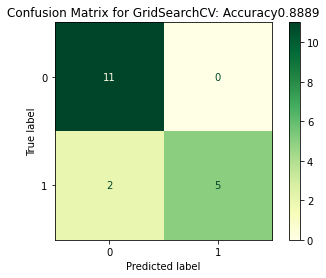

In [14]:
ConfusionMatrixDisplay.from_predictions(y_val.values, out, cmap='YlGn')
plt.title("""Confusion Matrix for GridSearchCV: Accuracy{:.4}""".format(accuracy))
plt.show()

In [15]:
y_test_randomforest = rfc.predict(x_test).tolist()
df_sub_randomforest = pd.DataFrame({"id":id_list, "label":y_test_randomforest})
df_sub_randomforest.to_csv("submission_randomforest.csv",index=False)